In [47]:

# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [48]:
import os
import json
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [50]:
print(os.listdir("../dataset/plantvillage dataset"))


print(len(os.listdir("../dataset/plantvillage dataset/segmented")))
print(os.listdir("../dataset/plantvillage dataset/segmented")[:5])

print(len(os.listdir("../dataset/plantvillage dataset/color")))
print(os.listdir("../dataset/plantvillage dataset/color")[:5])

print(len(os.listdir("../dataset/plantvillage dataset/grayscale")))
print(os.listdir("../dataset/plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [51]:
print(len(os.listdir("../dataset/plantvillage dataset/color/Grape___healthy")))
print(os.listdir("../dataset/plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


Data Preprocessing: 

In [52]:
# Dataset Path
base_dir = '../dataset/plantvillage dataset/color'

(256, 256, 3)


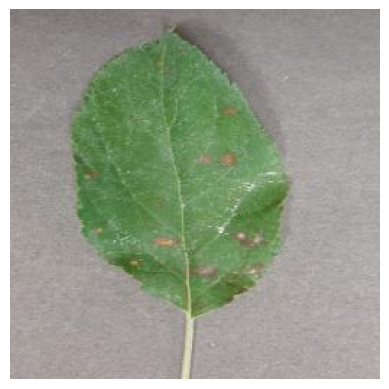

In [53]:
image_path = '../dataset/plantvillage dataset/color/Apple___Cedar_apple_rust/0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [54]:
image_path = '../dataset/plantvillage dataset/color/Apple___Cedar_apple_rust/0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG'

# Read the image
img = mpimg.imread(image_path)
print(img)


[[[129 124 121]
  [131 126 123]
  [131 126 123]
  ...
  [140 136 133]
  [134 130 127]
  [130 126 123]]

 [[131 126 123]
  [133 128 125]
  [132 127 124]
  ...
  [142 138 135]
  [141 137 134]
  [140 136 133]]

 [[122 117 114]
  [124 119 116]
  [127 122 119]
  ...
  [142 138 135]
  [145 141 138]
  [146 142 139]]

 ...

 [[161 151 150]
  [163 153 152]
  [165 155 154]
  ...
  [175 169 169]
  [179 173 173]
  [182 176 176]]

 [[160 150 149]
  [163 153 152]
  [167 157 156]
  ...
  [174 168 168]
  [175 169 169]
  [177 171 171]]

 [[172 162 161]
  [172 162 161]
  [172 162 161]
  ...
  [172 166 166]
  [170 164 164]
  [169 163 163]]]


In [55]:
# Image Parameters
img_size = 224
batch_size = 32

In [56]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [57]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [58]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [59]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [60]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     

In [62]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=20,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 671s 493ms/step - accuracy: 0.6063 - loss: 1.8586 - val_accuracy: 0.8567 - val_loss: 0.4458
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.5094
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 551s 405ms/step - accuracy: 0.9177 - loss: 0.2582 - val_accuracy: 0.8771 - val_loss: 0.4025
Epoch 4/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.3100e-04
Epoch 5/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 815s 600ms/step - accuracy: 0.9680 - loss: 0.0975 - val_accuracy: 0.8489 - val_loss: 0.5843
Epoch 6/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 36us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.6769
Epoch 7/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 762s 561ms/step - accuracy: 0.9764 - loss: 0.0741 - val_accuracy: 0.8790 - val_loss: 0.5060
Epoch 8/20
1358/1358 ━━━━━━━━━━━━━━━━━━

In [63]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.8512 - loss: 0.8382
Validation Accuracy: 85.28%


In [67]:
print(history.history)

{'accuracy': [0.7436487674713135, 0.0, 0.9158459305763245, 0.0, 0.9628589749336243, 0.0, 0.9716034531593323, 0.0, 0.9814065098762512, 0.0, 0.9814755320549011, 0.0, 0.9841218590736389, 0.0, 0.9874585866928101, 0.0, 0.988102912902832, 0.0, 0.9894145727157593, 0.0], 'loss': [0.9551485180854797, 0.0, 0.2631584107875824, 0.0, 0.11160328984260559, 0.0, 0.08821479231119156, 0.0, 0.05708124116063118, 0.0, 0.05872160568833351, 0.0, 0.052501093596220016, 0.0, 0.04130181297659874, 0.0, 0.04045473039150238, 0.0, 0.03570643067359924, 0.0], 'val_accuracy': [0.8567478060722351, 0.0, 0.8771201968193054, 1.0, 0.848912239074707, 1.0, 0.8789638876914978, 1.0, 0.8784107565879822, 1.0, 0.8790560364723206, 1.0, 0.856286883354187, 1.0, 0.8812684416770935, 1.0, 0.8516777157783508, 1.0, 0.8527839183807373, 1.0], 'val_loss': [0.44576239585876465, 1.5093989372253418, 0.4024956524372101, 0.00013100242358632386, 0.584347665309906, 0.6768724918365479, 0.5059660077095032, 0.007231726311147213, 0.5836359858512878, 0.

In [40]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [42]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}


In [43]:
class_indices


{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [44]:
json.dump(class_indices, open('class_indices.json', 'w'))


In [73]:
# Example Usage
image_path = '../test_images/apple_test.JPG'
# image_path = '../test_images/blueberry_test.jpg'
# image_path = '../test_images/potato_test.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Class Name: Potato___Late_blight


In [46]:
model.save('plant_disease_prediction_model.h5')